## Aim: To read the YOLO annotation and respective image to visualize the annotation 
    Input: Image and respective YOLO Annotation file
    YOLO file format is=> <ObjectClassID, x_center, y_center, width, height>
        *where x_center, y_center, width, height are normalized with 
        respect to image width and height

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
basepath = os.getcwd()
imgPath = os.path.join(basepath,"Images/YOLO/G0890012.JPG")

img = cv2.imread(imgPath,cv2.IMREAD_UNCHANGED)
# Converting openCV image to matplotlib format 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
heightImg, widthImg , channel =  img.shape

In [3]:
# ClassID to class name mapping
dict_class = {1:'Longitudinal',
                2:'Lateral',
                3:'Construction joint part',                           
                4:'Alligator crack',                                   
                5:'Wheel mark part' ,                                  
                6:'pothole',                                           
                7:'Rutting',                                           
                8:'Bump',                                              
                9:'White line blur' ,                                  
                10:'Cross walk blur',                                   
                11:'Manhole'
             }

In [4]:
textPath = os.path.join(basepath,"Images/YOLO/G0890012.txt")

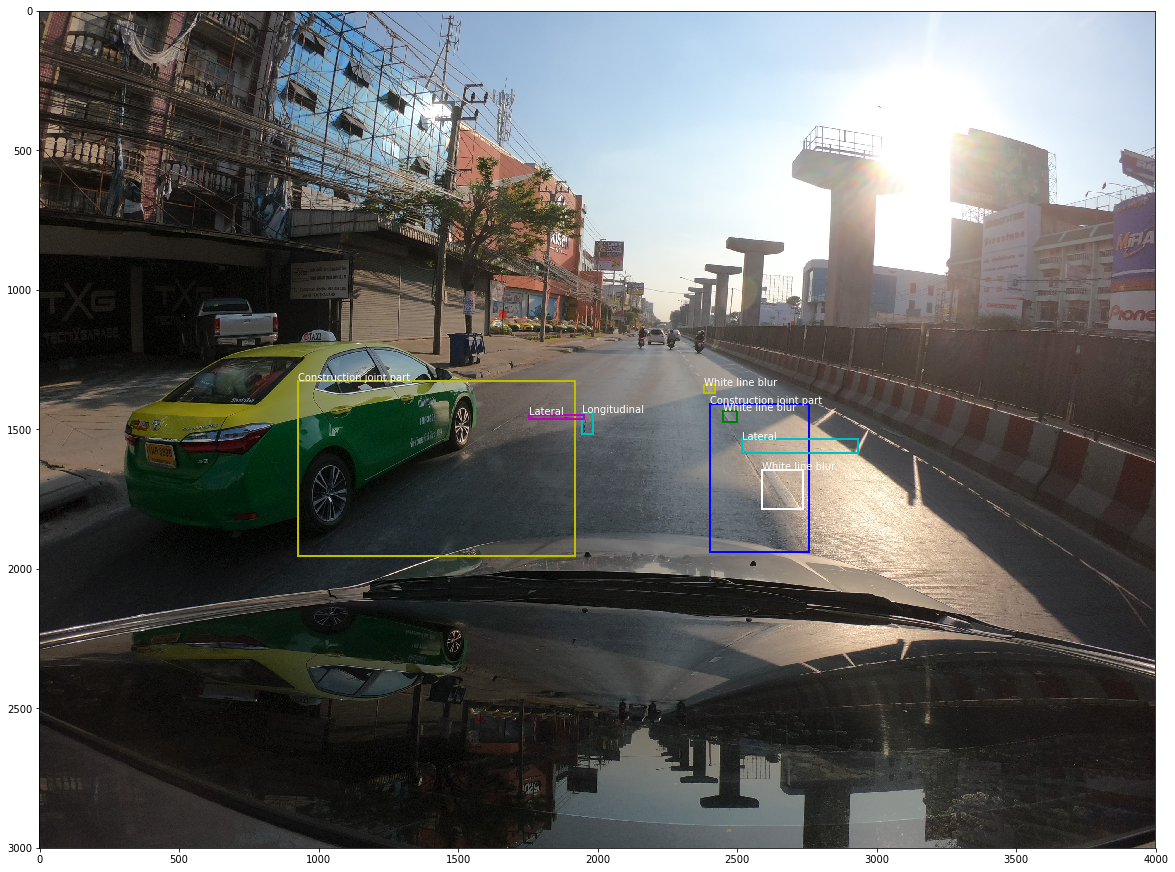

In [5]:
np.random.seed(1)
colors =  ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'] # Just to randomize the colors of the bbox
fig, ax = plt.subplots(1, figsize= (20,20))
ax.imshow(img)
# Add labels to the bbox
style = dict(size=10, color='white')

with open(textPath,'r') as textFile:
    for line in textFile:
        classID,x,y,width,height= (float(x) for x in line.split())
        x = np.multiply(x,widthImg)
        y = np.multiply(y,heightImg)
        width = np.multiply(width,widthImg)
        height = np.multiply(height,heightImg)
        classID,x,y,width,height= (int(x) for x in (classID,x,y,width,height))
        x_start = int(x-width/2)
        y_start = int(y-height/2)
#         print(classID,x,y,width,height,x_start,y_start)
        p = patches.Rectangle((x_start, y_start), width, height, 
                              linewidth=2,edgecolor = np.random.choice(colors),fill=False) 
        ax.add_patch(p)
        ax.text(x_start, y_start,dict_class[classID],**style)
plt.show()

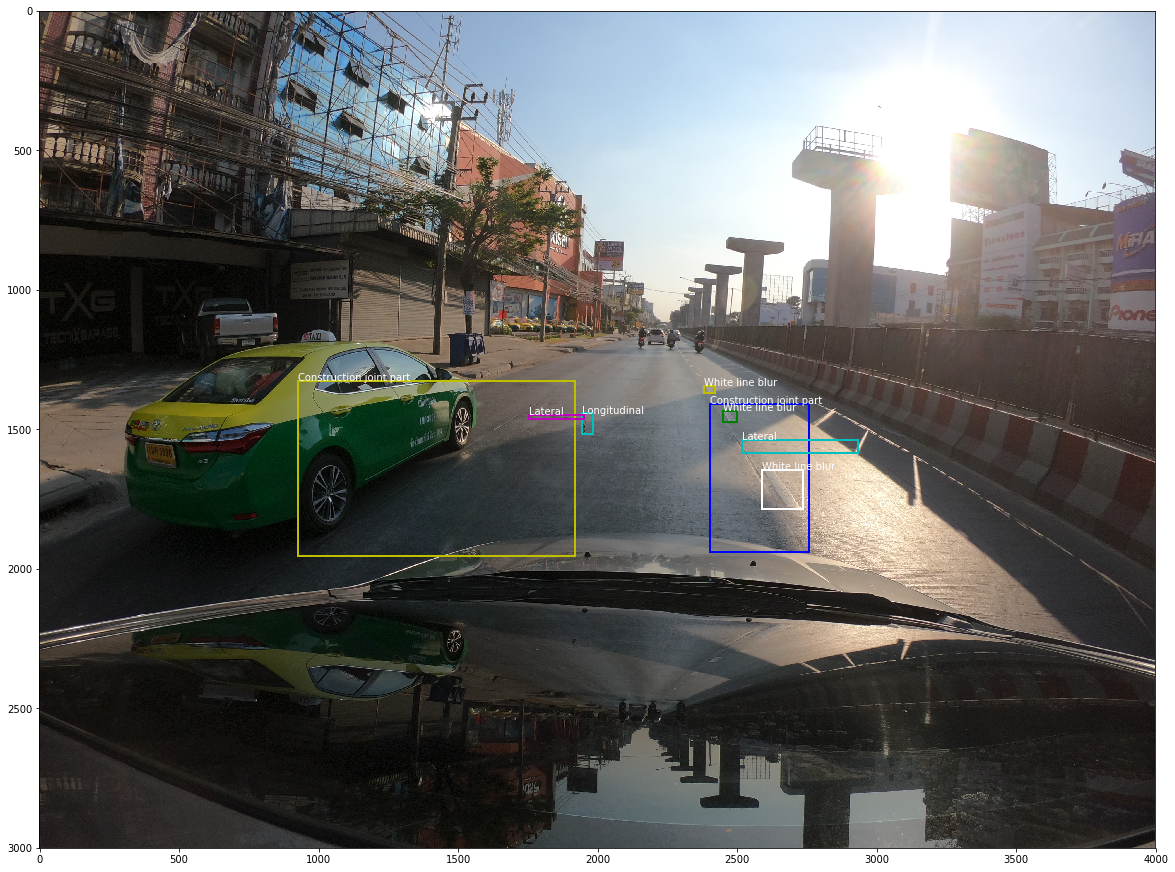

In [6]:
np.random.seed(1)
fig, ax = plt.subplots(1, figsize= (20,20))
ax.imshow(img)
bboxPath = os.path.join(basepath,"Images/YOLO/G0890012_bbox.txt")
with open(bboxPath,'r') as textFile:
    for line in textFile:
        classID,y_start,x_start,y_end,x_end= (float(x) for x in line.split())
        p = patches.Rectangle((x_start, y_start), (x_end-x_start), (y_end-y_start), linewidth=2,edgecolor = np.random.choice(colors),
                                facecolor = 'red',
                                fill=False) 
        ax.add_patch(p)
        ax.text(x_start, y_start,dict_class[classID],**style)
plt.show()